SCRIPT análisis correlaciones entre registros del diámetro troncal y registros del calibre frutal

In [ ]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
ruta_fruto = 'murcott.csv'
ruta_pickle = 'daily_por_tramo.pkl'

# === Cargar dataset de calibre ===
df_sang = pd.read_csv(ruta_fruto, parse_dates=['fecha'])
df_sang.set_index('fecha', inplace=True)

with open(ruta_pickle, 'rb') as f:
    daily_por_tramo = pickle.load(f)

# === Periodos del nodo 4, cada uno se asocia con un índice en daily_por_tramo[4] === los periodos de la variedad Murcott aparecen también en el script de Preprocesado
periodos_4 = [
    ("01/05/2018", "30/11/2018"),
    ("01/04/2019", "30/11/2019"),
    ("09/04/2021", "15/11/2021"),
    ("07/05/2022", "14/11/2022"),
    ("01/04/2023", "30/11/2023"),
]

df_combinados = []

for i, (inicio_str, fin_str) in enumerate(periodos_4):
    inicio = pd.to_datetime(inicio_str, dayfirst=True)
    fin = pd.to_datetime(fin_str, dayfirst=True)

    # --- Fruto ---
    df_fruto_periodo = df_sang.loc[inicio:fin].copy()

    # --- Dendrómetro ---
    df_dendro = daily_por_tramo[4][i].copy()
    df_dendro.index = pd.to_datetime(df_dendro.index)

    # Extraer MNDT
    serie_mndt = df_dendro['MNDT'].rename('MNDT')

    # Hacer join solo con las fechas del fruto (left join)
    df_fruto_periodo = df_fruto_periodo.join(serie_mndt, how='left')

    # Añadir columna de año o de periodo para trazar luego si se desea
    df_fruto_periodo['periodo'] = f'Periodo_{i+1}'

    # Guardar en la lista
    df_combinados.append(df_fruto_periodo)

df_sang_completo = pd.concat(df_combinados).sort_index()

df_sang_completo

,calibre_mm,desviacion,crecimiento_diario_mm,MNDT,periodo
fecha,,,,,
2018-06-14,9.75,1.49,NaN,38.5450,Periodo_1
2018-06-21,11.57,1.86,0.26,38.6950,Periodo_1
2018-06-28,15.05,2.31,0.50,38.7550,Periodo_1
2018-07-06,17.96,2.39,0.36,38.7250,Periodo_1
2018-07-12,20.69,2.64,0.46,38.7300,Periodo_1
2018-07-19,22.78,2.83,0.30,38.8400,Periodo_1
2018-07-26,25.64,2.93,0.41,39.1125,Periodo_1
2018-08-09,29.36,3.47,0.27,39.6725,Periodo_1
2018-08-23,32.59,3.79,0.23,40.1550,Periodo_1


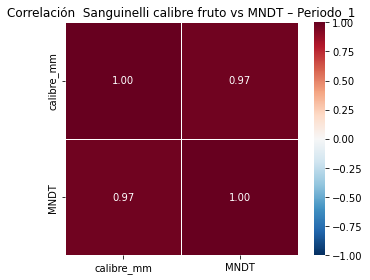

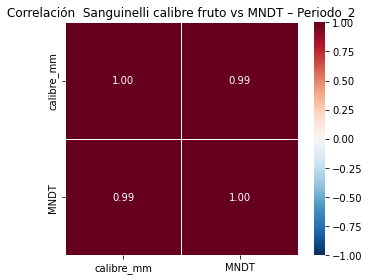

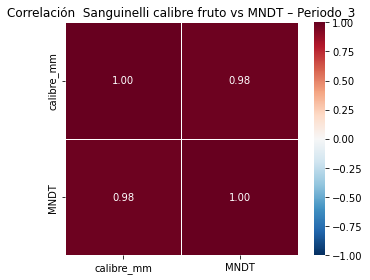

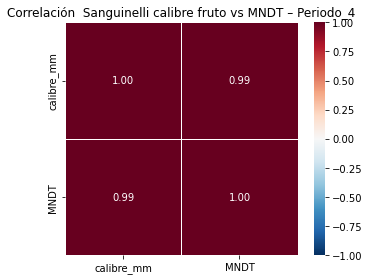

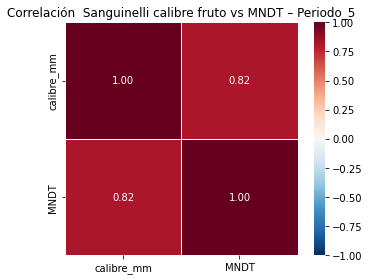

In [ ]:
df = df_sang_completo

periodos_unicos = df['periodo'].unique()

# === Recorrer cada periodo y generar su heatmap si hay datos suficientes ===
for periodo in periodos_unicos:
    df_periodo = df[df['periodo'] == periodo][['calibre_mm', 'MNDT']].dropna()

    if len(df_periodo) >= 3 and df_periodo.std().min() > 0:
        corr = df_periodo.corr()

        plt.figure(figsize=(5, 4))
        sns.heatmap(
            corr,
            annot=True, fmt=".2f",
            cmap='RdBu_r', vmin=-1, vmax=1,
            square=True, linewidths=0.5
        )
        plt.title(f'Correlación  Sanguinelli calibre fruto vs MNDT – {periodo}')
        plt.tight_layout()
        plt.show()


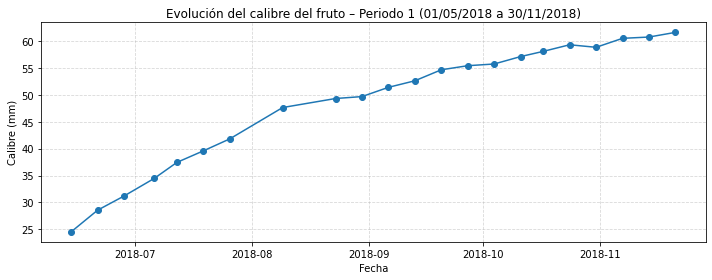

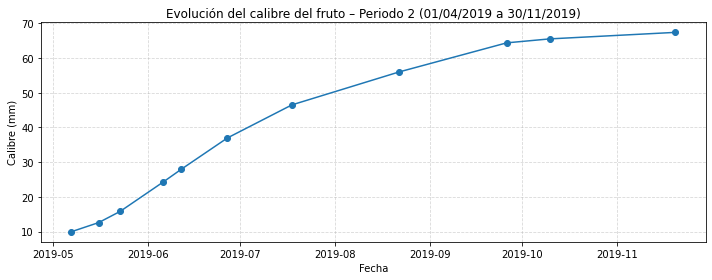

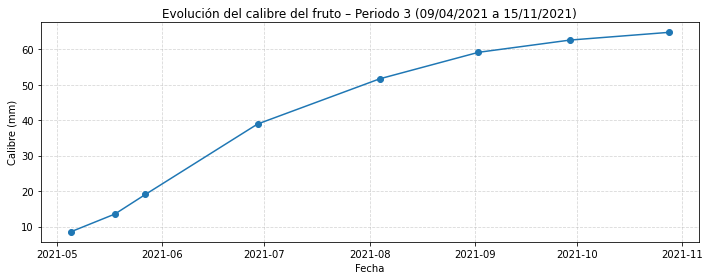

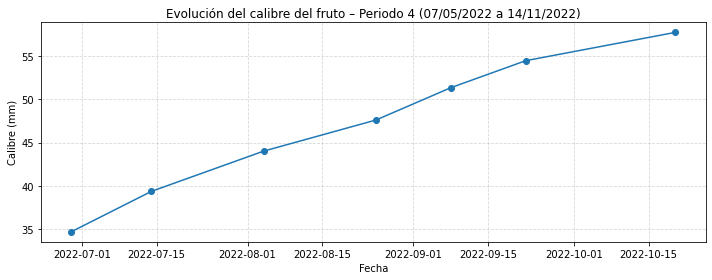

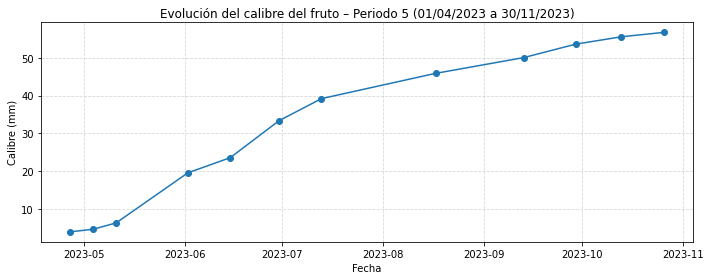

In [4]:
# === Gráficos de líneas por periodo del calibre de fruto (Nodo 4) ===
for i, (inicio_str, fin_str) in enumerate(periodos_4):
    inicio = pd.to_datetime(inicio_str, dayfirst=True)
    fin = pd.to_datetime(fin_str, dayfirst=True)

    # Extraer datos del calibre del fruto en ese periodo
    df_periodo = df_sang.loc[inicio:fin].copy()

    if df_periodo.empty:
        print(f"Periodo {i+1} vacío, se omite.")
        continue

    # Crear gráfico de líneas
    plt.figure(figsize=(10, 4))
    plt.plot(df_periodo.index, df_periodo['calibre_mm'], marker='o', linestyle='-')
    plt.title(f"Evolución del calibre del fruto – Periodo {i+1} ({inicio_str} a {fin_str})")
    plt.xlabel("Fecha")
    plt.ylabel("Calibre (mm)")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [ ]:
# === Periodos definidos para el nodo 4 ===
periodos_4 = [
    ("01/05/2018", "30/11/2018"),
    ("01/04/2019", "30/11/2019"),
    ("09/04/2021", "15/11/2021"),
    ("07/05/2022", "14/11/2022"),
    ("01/04/2023", "30/11/2023"),
]

# === DataFrame resumen ===
resumen = []

for i, (inicio_str, fin_str) in enumerate(periodos_4):
    inicio = pd.to_datetime(inicio_str, dayfirst=True)
    fin = pd.to_datetime(fin_str, dayfirst=True)
    
    # Fruto (sanguinelli)
    df_periodo = df_sang.loc[inicio:fin]['calibre_mm'].dropna()
    
    # MNDT
    df_dendro = daily_por_tramo[4][i].copy()
    df_dendro.index = pd.to_datetime(df_dendro.index)
    serie_mndt = df_dendro['MNDT'].dropna()
    
    # Correlación
    df_merge = df_periodo.to_frame().join(serie_mndt, how='left').dropna()
    r = df_merge.corr().iloc[0, 1] if len(df_merge) >= 3 and df_merge.std().min() > 0 else np.nan
    
    # Nº lecturas
    n = len(df_periodo)
    
    # Crecimiento neto
    crecimiento = df_periodo.iloc[-1] - df_periodo.iloc[0] if n >= 2 else np.nan

    # Año del periodo (el año inicial)
    anio = inicio.year

    resumen.append({
        "Periodo": f"Periodo {i}",
        "Año": anio,
        "Correlación": round(r, 2) if pd.notna(r) else np.nan,
        "Nº lecturas": n,
        "Crecimiento neto (mm)": round(crecimiento, 2) if pd.notna(crecimiento) else np.nan
    })

df_resumen = pd.DataFrame(resumen)
df_resumen

,Periodo,Año,Correlación,Nº lecturas,Crecimiento neto (mm)
0,Periodo 0,2018,0.94,22,37.15
1,Periodo 1,2019,0.98,11,57.44
2,Periodo 2,2021,0.97,8,56.28
3,Periodo 3,2022,0.99,7,23.03
4,Periodo 4,2023,0.93,12,52.75
